In [2]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
from sklearn import preprocessing
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
datas = pd.read_csv('sold_info.csv')


#split data
datas['postCode'] = datas['address'].map(lambda x: ' '.join(x.split(' ')[-2:]))
datas['houseType'] = datas['soldType'].map(lambda x: x.split(',')[0])
datas['residential'] = datas['soldType'].map(lambda x: x.split(',')[2])
datas['duration'] = datas['soldType'].map(lambda x: x.split(',')[1])

In [6]:
datas.head()

,Unnamed: 0,address,bedrooms,city,price,soldDate,soldType,postCode,houseType,residential,duration
0,0,"1, Old Newbridge Hill, Bath, Bath And North Ea...",4 bedrooms,Bath,"£487,000",23 Apr 2019,"Semi-Detached, Freehold, Residential",BA1 3LX,Semi-Detached,Residential,Freehold
1,1,"7, Belgrave Road, Bath, Bath And North East So...",NaN,Bath,"£1,096,000",18 Apr 2019,"Semi-Detached, Leasehold, Residential",BA1 6LU,Semi-Detached,Residential,Leasehold
2,2,"97, Greenway Lane, Bath, Bath And North East S...",NaN,Bath,"£1,250,000",18 Apr 2019,"Detached, Freehold, Residential",BA2 4LN,Detached,Residential,Freehold
3,3,"Orchard Leigh, Eden Villas, Bath, Bath And Nor...",4 bedrooms,Bath,"£483,000",17 Apr 2019,"Semi-Detached, Freehold, Residential",BA1 6SH,Semi-Detached,Residential,Freehold
4,4,"5, Parry Close, Bath, Bath And North East Some...",2 bedrooms,Bath,"£285,000",16 Apr 2019,"Semi-Detached, Freehold, Residential",BA2 1JR,Semi-Detached,Residential,Freehold


In [39]:
datas['bedrooms'] = datas['bedrooms'].str.extract('(\d+)')



In [40]:
datas['price'] = datas['price'].str.extract('([\d,]+)')

In [41]:
datas['price'] = datas['price'].map(lambda x: ''.join(x.split(',')))

In [42]:
datas['soldDate'] = datas['soldDate'].map(lambda x: datetime.strptime(x, '%d %b %Y'))

In [80]:
df1 = datas.drop(['soldType'], axis=1)
#drop null values
df = pd.DataFrame(df1.dropna(subset=['bedrooms']))

In [81]:
df

,Unnamed: 0,address,bedrooms,city,price,soldDate,postCode,houseType,residential,duration
0,0,"1, Old Newbridge Hill, Bath, Bath And North Ea...",4,Bath,487000,2019-04-23,BA1 3LX,Semi-Detached,Residential,Freehold
3,3,"Orchard Leigh, Eden Villas, Bath, Bath And Nor...",4,Bath,483000,2019-04-17,BA1 6SH,Semi-Detached,Residential,Freehold
4,4,"5, Parry Close, Bath, Bath And North East Some...",2,Bath,285000,2019-04-16,BA2 1JR,Semi-Detached,Residential,Freehold
5,5,"10, Freeview Road, Bath, Bath And North East S...",2,Bath,250000,2019-04-15,BA2 1DR,Semi-Detached,Residential,Freehold
6,6,"18, Vernham Grove, Bath, Bath And North East S...",3,Bath,267000,2019-04-15,BA2 2TB,Terraced,Residential,Freehold
9,9,"125, Southlands, Bath, Bath And North East Som...",3,Bath,252000,2019-04-12,BA1 4DZ,Semi-Detached,Residential,Freehold
10,10,"88, Vernham Grove, Bath, Bath And North East S...",2,Bath,170000,2019-04-12,BA2 2TB,Terraced,Residential,Freehold
11,11,"177, Ringswell Gardens, Bath, Bath And North E...",3,Bath,340000,2019-04-12,BA1 6BP,Terraced,Residential,Leasehold
12,12,"105, High Street, Weston, Bath, Bath And North...",2,Bath,301000,2019-04-11,BA1 4DQ,Terraced,Residential,Freehold
13,13,"3, Inverness Road, Bath, Bath And North East S...",2,Bath,290000,2019-04-10,BA2 3RX,Terraced,Residential,Freehold


Text(0.5, 1.0, 'property sales trend')

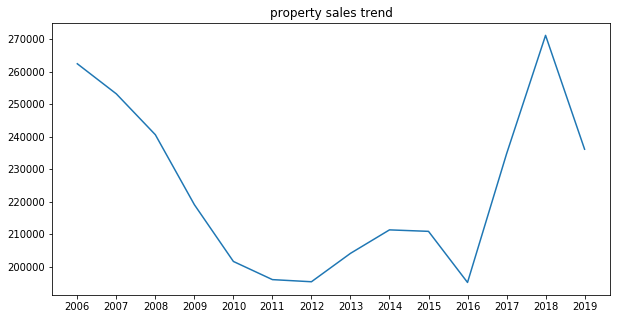

In [82]:
#analyze data:
##Let's check the average property sales trend
years = df['soldDate'].apply(lambda x: x.year).unique()
years
# df['price'] = df['price'].astype(int)
df.loc[:, ['price']] = df['price'].astype(int)
price = df['price'].groupby(df['soldDate'].apply(lambda x: x.year)).mean()
plt.subplots(figsize= (10, 5))

plt.plot(years, price)
plt.xticks(years)
plt.title('property sales trend')
##Conclusion:
#------looks strange and seems no help-----

In [46]:
#check the sold house qty by year
sold_qty = df['Unnamed: 0'].groupby(df['soldDate'].apply(lambda x: x.year)).count()
sold_qty

#conclution: increasing

soldDate
2006      15
2007      60
2008      41
2009     106
2010     152
2011     129
2012     153
2013     311
2014     681
2015    1038
2016    1760
2017    2751
2018    5360
2019    1547
Name: Unnamed: 0, dtype: int64

In [47]:
#checked the offical property price during last 10 years, no big changes, so I decide use data from 2011.
df_from_2011 = df[(df['soldDate']>='2011-01-01')]

In [48]:
postcode_lon_lat = pd.read_csv('ukpostcodes.csv')
postcode_lon_lat.head()

,id,postcode,latitude,longitude
0,1,AB10 1XG,57.144165,-2.114848
1,2,AB10 6RN,57.137880,-2.121487
2,3,AB10 7JB,57.124274,-2.127190
3,4,AB11 5QN,57.142701,-2.093295
4,5,AB11 6UL,57.137547,-2.112233


In [49]:
postcode_lon_lat[postcode_lon_lat['postcode'] == 'BA20 2HE']

,id,postcode,latitude,longitude
1558395,1643832,BA20 2HE,50.926584,-2.664301


In [50]:
merge_df = pd.merge(df_from_2011, postcode_lon_lat,how = 'left', left_on = 'postCode',right_on =  'postcode')

In [51]:
merge_df

,Unnamed: 0,address,bedrooms,city,price,soldDate,postCode,houseType,residential,duration,id,postcode,latitude,longitude
0,0,"1, Old Newbridge Hill, Bath, Bath And North Ea...",4,Bath,487000,2019-04-23,BA1 3LX,Semi-Detached,Residential,Freehold,1652513,BA1 3LX,51.389446,-2.401029
1,3,"Orchard Leigh, Eden Villas, Bath, Bath And Nor...",4,Bath,483000,2019-04-17,BA1 6SH,Semi-Detached,Residential,Freehold,1651917,BA1 6SH,51.398812,-2.345813
2,4,"5, Parry Close, Bath, Bath And North East Some...",2,Bath,285000,2019-04-16,BA2 1JR,Semi-Detached,Residential,Freehold,1645731,BA2 1JR,51.373936,-2.390162
3,5,"10, Freeview Road, Bath, Bath And North East S...",2,Bath,250000,2019-04-15,BA2 1DR,Semi-Detached,Residential,Freehold,1646114,BA2 1DR,51.379450,-2.397522
4,6,"18, Vernham Grove, Bath, Bath And North East S...",3,Bath,267000,2019-04-15,BA2 2TB,Terraced,Residential,Freehold,1645682,BA2 2TB,51.358799,-2.383168
5,9,"125, Southlands, Bath, Bath And North East Som...",3,Bath,252000,2019-04-12,BA1 4DZ,Semi-Detached,Residential,Freehold,1652160,BA1 4DZ,51.396581,-2.394206
6,10,"88, Vernham Grove, Bath, Bath And North East S...",2,Bath,170000,2019-04-12,BA2 2TB,Terraced,Residential,Freehold,1645682,BA2 2TB,51.358799,-2.383168
7,11,"177, Ringswell Gardens, Bath, Bath And North E...",3,Bath,340000,2019-04-12,BA1 6BP,Terraced,Residential,Leasehold,1651644,BA1 6BP,51.393020,-2.346114
8,12,"105, High Street, Weston, Bath, Bath And North...",2,Bath,301000,2019-04-11,BA1 4DQ,Terraced,Residential,Freehold,1652152,BA1 4DQ,51.397892,-2.394793
9,13,"3, Inverness Road, Bath, Bath And North East S...",2,Bath,290000,2019-04-10,BA2 3RX,Terraced,Residential,Freehold,1645510,BA2 3RX,51.380642,-2.385304


In [73]:
df_final = pd.DataFrame(merge_df[['bedrooms', 'price','houseType', 'residential', 'duration', 'latitude', 'longitude']])

In [74]:

#transform houseTypes: 'Semi-Detached':0, 'Terraced':1, 'Flat':2, 'Detached':3
df_final['houseType'].replace('Semi-Detached', 0, inplace=True)
df_final['houseType'].replace('Terraced', 1, inplace=True)
df_final['houseType'].replace('Flat', 2, inplace=True)
df_final['houseType'].replace('Detached', 3, inplace=True)

In [75]:
#transform residential:  Residential\xa0(New Build):1, ' Residential':0
df_final['residential'].unique()
df_final['residential'].replace(' Residential', 0, inplace=True)
df_final['residential'].replace(' Residential\xa0(New Build)', 1, inplace=True)

In [76]:
#transform duration:' Freehold':0, ' Leasehold':1
df_final['duration'].unique()
df_final['duration'].replace(' Freehold', 0, inplace=True)
df_final['duration'].replace(' Leasehold', 1, inplace=True)


In [77]:
df_final['duration'].unique()

array([0, 1], dtype=int64)

In [8]:
df_final.head()

NameError: name 'df_final' is not defined

In [107]:
df_final['bedrooms'] = df_final['bedrooms'].astype(int)

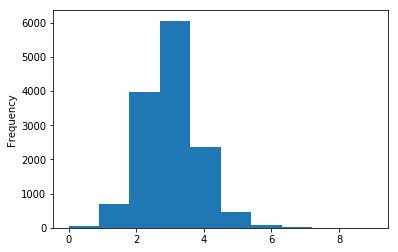

In [117]:
df_final['bedrooms'].plot.hist()

In [116]:
df_final['bedrooms'].value_counts()

3    6060
2    3980
4    2375
1     697
5     460
6      82
0      52
7      18
8       5
9       1
Name: bedrooms, dtype: int64

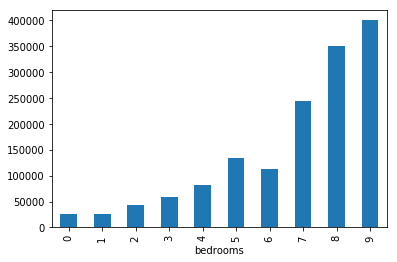

In [124]:
df_final.groupby(['bedrooms']).agg('min')['price'].plot.bar()

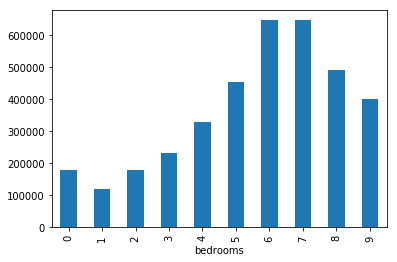

In [125]:
df_final.groupby(['bedrooms']).agg('mean')['price'].plot.bar()

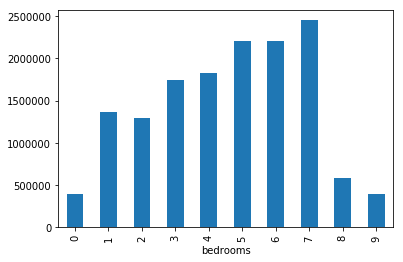

In [126]:
df_final.groupby(['bedrooms']).agg('max')['price'].plot.bar()

In [128]:
trains = df_final[['bedrooms', 'houseType', 'residential', 'duration', 'latitude', 'longitude']]
results = df_final['price']

In [127]:
###build the models and envaluate the model:
# seed = 7
# scoring = 'accuracy'
# models = []
# models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(gamma='auto')))
# # evaluate each model in turn
# result = []
# names = []
# for name, model in models:  

#     kfold = model_selection.KFold(n_splits=10, random_state=seed)
#     cv_results = model_selection.cross_val_score(model, trains, results, cv=kfold, scoring=scoring)
#     result.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)


TypeError: SVC() got an unexpected keyword argument 'gamma'

In [135]:
def LinearRegression_tain( trains, results):
    lr = LinearRegression()
    lr.fit(trains, results)
    score = lr.score(trains, results)
    return score

In [140]:
LinearRegression_tain(trains,results)

0.44211488687147205

In [147]:
def prediction_svm(trains, results):
    svm = SVC(gamma='auto')
    svm.fit(trains, results)
    return svm.score(trains, results)

In [148]:

prediction_svm(trains,results)

TypeError: SVC() got an unexpected keyword argument 'gamma'

In [151]:
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
regr.fit(trains, results)
regr.score(trains, results)

0.4344999975507475